In [1]:
import tensorflow as tf
import os

In [2]:
#using chrome extension - Download all images 
# we can dowmload the dataset using that of  happy and sad

In [3]:
import cv2
import imghdr
#import image hdr

C:\Users\mrhim\AppData\Local\Temp\ipykernel_1508\3139216932.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg','jpg','bmp','png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [6]:
os.listdir('data')

['happy', 'sad']

In [7]:
# os.listdir(os.path.join('data','sad'))

In [8]:
for image_class in os.listdir('data'):
    for image in os.listdir(os.path.join('data',image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))
                

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 281 files belonging to 2 classes.


In [13]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [16]:
batch = data_iterator.next()

In [17]:
len(batch)
#image and label
    

2

In [18]:
batch[0].shape #image

(32, 256, 256, 3)

In [19]:
batch[1].shape #label

(32,)

In [20]:
batch[1]

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [22]:
batch

(array([[[[2.28192139e+02, 2.18192139e+02, 1.93192139e+02],
          [2.27000000e+02, 2.17000000e+02, 1.92000000e+02],
          [2.27427734e+02, 2.17427734e+02, 1.92427734e+02],
          ...,
          [2.52000000e+02, 2.52000000e+02, 2.44000000e+02],
          [2.52000000e+02, 2.52000000e+02, 2.44000000e+02],
          [2.52000000e+02, 2.52000000e+02, 2.43101562e+02]],
 
         [[2.28000000e+02, 2.18000000e+02, 1.93000000e+02],
          [2.27000000e+02, 2.17000000e+02, 1.92000000e+02],
          [2.27000000e+02, 2.17000000e+02, 1.92000000e+02],
          ...,
          [2.52000000e+02, 2.52000000e+02, 2.44000000e+02],
          [2.52000000e+02, 2.52000000e+02, 2.44000000e+02],
          [2.52000000e+02, 2.52000000e+02, 2.43101562e+02]],
 
         [[2.27000000e+02, 2.17000000e+02, 1.92000000e+02],
          [2.28000000e+02, 2.18000000e+02, 1.93000000e+02],
          [2.28000000e+02, 2.18000000e+02, 1.93000000e+02],
          ...,
          [2.52000000e+02, 2.52000000e+02, 2.4400

In [21]:
# batch size is 32 as default for tf.keras.utils.image_dataset_from_directory

In [44]:
#we can see 0 and 1 are which for happy and sad


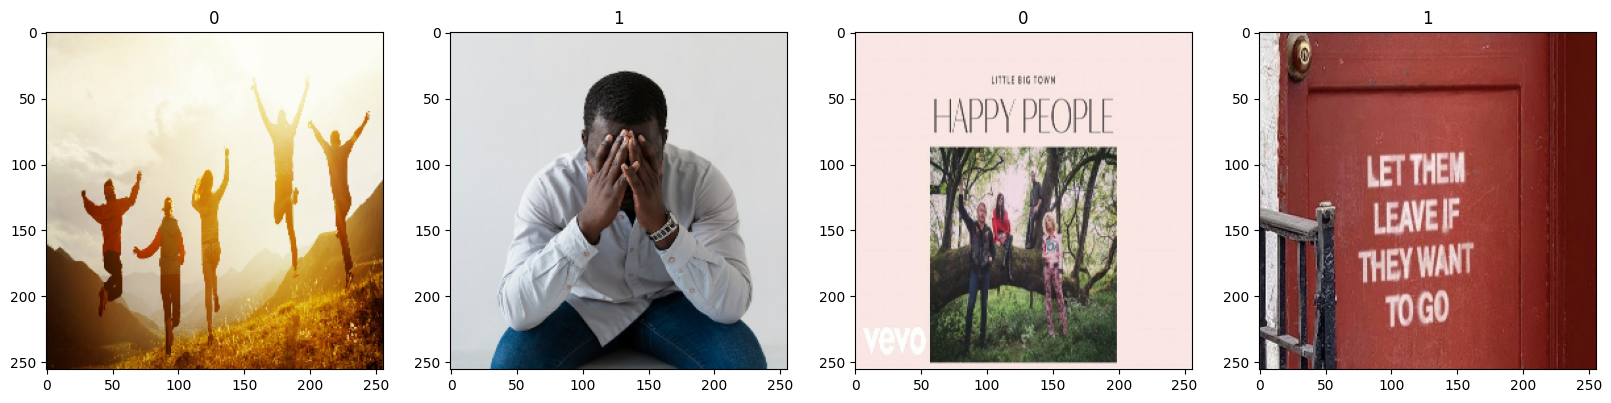

In [23]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
#so 1 is SAD and 0 is HAPPY

In [46]:
batch[0].min()

0.0

In [48]:
batch[0].max()

255.0

In [49]:
batch[1].min()

0

In [51]:
batch[1].max()

1

In [52]:
# so we need to scale the data from 0 to 1 for batch[0] 

In [54]:
#method1
scaled = batch[0]/255
scaled.min(),scaled.max()


(0.0, 1.0)

In [56]:
#method 2  (Priority)

In [25]:
data = data.map(lambda x,y: (x/255,y))

In [29]:
scaled_iterator=data.as_numpy_iterator()
batch = scaled_iterator.next()

In [30]:
data.as_numpy_iterator().next()[0].max()

1.0

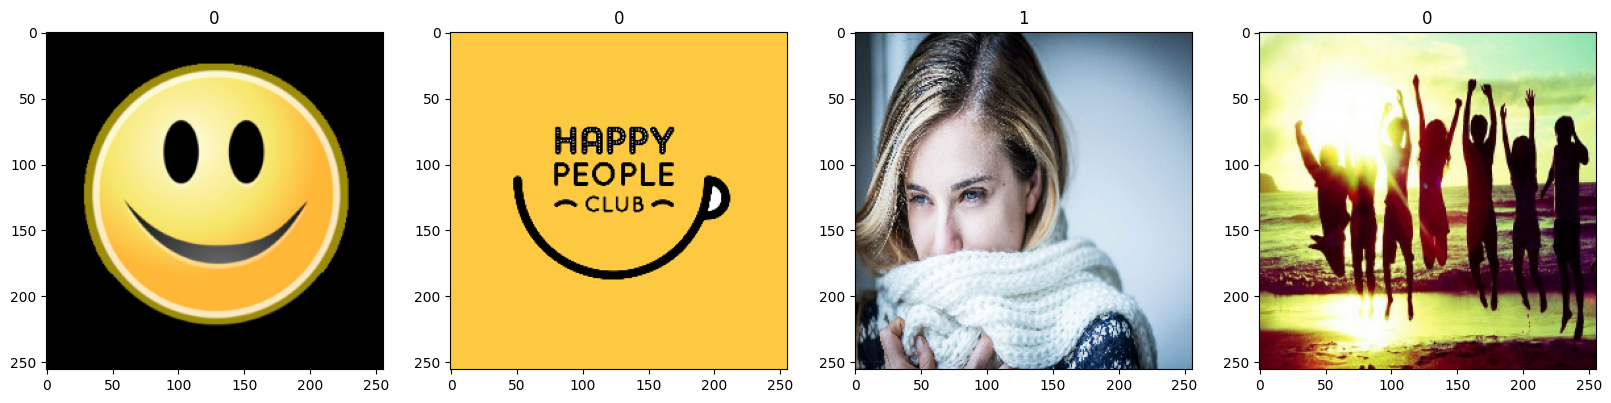

In [31]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [32]:
batch[0].max()

1.0

In [33]:
batch[0].min()

0.0

In [34]:
len(data)

9

In [35]:
len(batch)

2

In [47]:
train_size =int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [ ]:
# 281/32

In [37]:
data 

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [48]:
train_size

6

In [49]:
val_size

2

In [50]:
test_size

1

In [53]:
train = data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [55]:
len(train),len(val),len(test)

(6, 2, 1)

#Model Building

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [57]:
model = Sequential()

In [58]:
#16 filter kernal size = (3,3)
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [59]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [61]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [62]:
hist = model.fit(train,epochs=15,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/15
6/6 [==============================] - 13s 1s/step - loss: 1.3450 - accuracy: 0.4583 - val_loss: 0.6727 - val_accuracy: 0.6406
Epoch 2/15
6/6 [==============================] - 10s 1s/step - loss: 0.6783 - accuracy: 0.5573 - val_loss: 0.6487 - val_accuracy: 0.6094
Epoch 3/15
6/6 [==============================] - 10s 1s/step - loss: 0.6703 - accuracy: 0.5833 - val_loss: 0.6561 - val_accuracy: 0.7656
Epoch 4/15
6/6 [==============================] - 10s 1s/step - loss: 0.6287 - accuracy: 0.6875 - val_loss: 0.5511 - val_accuracy: 0.7969
Epoch 5/15
6/6 [==============================] - 10s 1s/step - loss: 0.5485 - accuracy: 0.6979 - val_loss: 0.5704 - val_accuracy: 0.6875
Epoch 6/15
6/6 [==============================] - 11s 2s/step - loss: 0.4524 - accuracy: 0.8021 - val_loss: 0.3886 - val_accuracy: 0.8594
Epoch 7/15
6/6 [==============================] - 13s 2s/step - loss: 0.4107 - accuracy: 0.8385 - val_loss: 0.3731 - val_accuracy: 0.8594
Epoch 8/15
6/6 [==================

In [63]:
hist.history

{'loss': [1.3449681997299194,
  0.6783356070518494,
  0.6702800393104553,
  0.6287457346916199,
  0.548518180847168,
  0.4524402320384979,
  0.41069164872169495,
  0.3647552728652954,
  0.32010748982429504,
  0.2952587306499481,
  0.2055153250694275,
  0.19582659006118774,
  0.1313401311635971,
  0.1071304976940155,
  0.060902953147888184],
 'accuracy': [0.4583333432674408,
  0.5572916865348816,
  0.5833333134651184,
  0.6875,
  0.6979166865348816,
  0.8020833134651184,
  0.8385416865348816,
  0.8541666865348816,
  0.875,
  0.9114583134651184,
  0.9427083134651184,
  0.9427083134651184,
  0.96875,
  0.9583333134651184,
  0.9895833134651184],
 'val_loss': [0.6726746559143066,
  0.6486562490463257,
  0.6560953855514526,
  0.5510848760604858,
  0.5704319477081299,
  0.3885789215564728,
  0.3730929493904114,
  0.35252851247787476,
  0.344865083694458,
  0.18466998636722565,
  0.1877284049987793,
  0.10197651386260986,
  0.16454371809959412,
  0.06468658149242401,
  0.05967527627944946],
 '

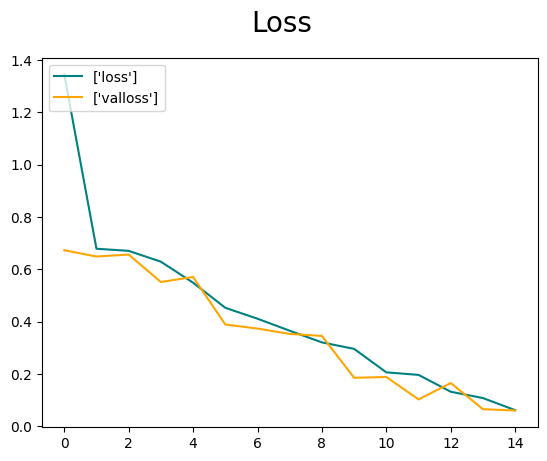

In [66]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label=['loss'])
plt.plot(hist.history['val_loss'],color='orange',label=['valloss'])
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

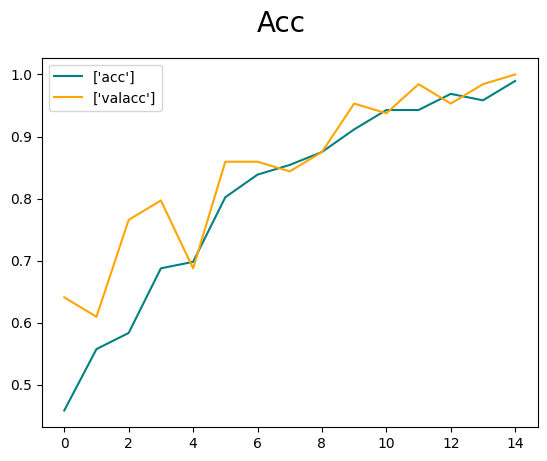

In [68]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label=['acc'])
plt.plot(hist.history['val_accuracy'],color='orange',label=['valacc'])
fig.suptitle('Acc',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [69]:
#evaluation

In [70]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [71]:
pre = Precision()
re=Recall()
acc=BinaryAccuracy()

In [74]:
# len(pre),len(re),len(acc)

In [80]:
for batch in test.as_numpy_iterator():
    X,y=batch
    predicted=model.predict(X)
    pre.update_state(y,predicted)
    re.update_state(y,predicted)
    acc.update_state(y,predicted)
    

1/1 [==============================] - 0s 364ms/step


In [79]:
# X,y=batch
# y

In [85]:
pre.result().numpy(),re.result().numpy(),acc.result().numpy()

(1.0, 1.0, 1.0)

In [95]:
img = cv2.imread('154006829.jpg')
cv2.imshow('s',img)
cv2.waitKey()
cv2.destroyAllWindows()

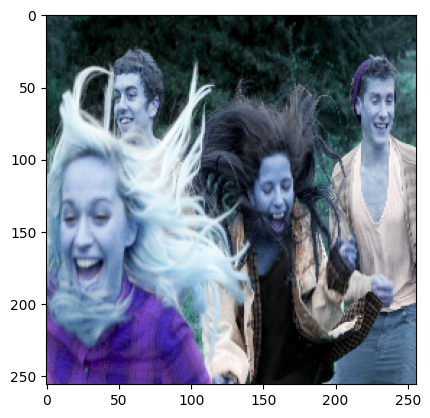

In [97]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [98]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 58ms/step


In [99]:
yhat

array([[0.03735226]], dtype=float32)

In [100]:
if yhat>0.5:
    print('Sad')
else:
    print('Happy')
    

Happy


In [101]:
from tensorflow.keras.models import load_model


In [102]:
model.save('happysad.h5')

C:\Users\mrhim\anaconda3\envs\project1\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
